In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.losses import BinaryCrossentropy
from keras.metrics import BinaryAccuracy

In [12]:
data = pd.read_csv("final_data.csv")
data.head()

,Pathway(ConsensusPathDB):IS,Function_description:IS,Interactions(ConsensusPathDB):IS,RVIS_percentile_EVS:IS,HIPred_Y:IS,ExAC_cnv_flag_N:IS,ExAC_cnv_flag_Y:IS,Gene damage prediction (all disease-causing genes)_High:IS,Gene damage prediction (all Mendelian disease-causing genes)_High:IS,Gene damage prediction (all Mendelian disease-causing genes)_Low:IS,clinSign
0,1,1,0.120411,-0.406600,1,1,0,0,0,0,1
1,1,1,0.004651,-0.725675,1,1,0,0,0,0,1
2,1,1,0.004651,-0.725675,1,1,0,0,0,0,1
3,1,1,0.003168,0.053669,1,1,0,0,0,0,1
4,0,1,0.000150,-0.642293,1,1,0,0,0,0,1


In [13]:
input_columns = data.columns[0:10]
output_column = data.columns[-1]

In [14]:

def toarray(row):
    return [row[i] for i in input_columns]

temp = data.apply(toarray,axis=1)
data = pd.DataFrame(list(zip(temp,data[output_column])),columns=("input","output"))

x = np.array(data['input'].tolist())
y = np.array(data['output'].tolist())

data.head()


,input,output
0,"[1.0, 1.0, 0.120410661, -0.40659957, 1.0, 1.0,...",1
1,"[1.0, 1.0, 0.00465053, -0.725674551, 1.0, 1.0,...",1
2,"[1.0, 1.0, 0.00465053, -0.725674551, 1.0, 1.0,...",1
3,"[1.0, 1.0, 0.003168344, 0.053668869, 1.0, 1.0,...",1
4,"[0.0, 1.0, 0.000149578, -0.642292587, 1.0, 1.0...",1


In [15]:
mms = MinMaxScaler()
test = x.copy()
x = mms.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=42)
x_train

array([[1.00000000e+00, 1.00000000e+00, 1.41985011e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 8.76107672e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 1.27383217e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 1.00000000e+00, 3.06331614e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [16]:
# Compile the model
model = Sequential([
    Dense(16, input_dim=10, activation='relu'),
    Dense(64, activation='sigmoid'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss=BinaryCrossentropy(), optimizer="adam", metrics=[BinaryAccuracy()])

In [17]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20
155/155 [==============================] - 3s 7ms/step - loss: 0.6070 - binary_accuracy: 0.6950 - val_loss: 0.5804 - val_binary_accuracy: 0.7106
Epoch 2/20
155/155 [==============================] - 1s 4ms/step - loss: 0.5810 - binary_accuracy: 0.6974 - val_loss: 0.5611 - val_binary_accuracy: 0.7106
Epoch 3/20
155/155 [==============================] - 1s 4ms/step - loss: 0.5707 - binary_accuracy: 0.7104 - val_loss: 0.5597 - val_binary_accuracy: 0.7070
Epoch 4/20
155/155 [==============================] - 1s 5ms/step - loss: 0.5679 - binary_accuracy: 0.7112 - val_loss: 0.5618 - val_binary_accuracy: 0.7070
Epoch 5/20
155/155 [==============================] - 1s 4ms/step - loss: 0.5646 - binary_accuracy: 0.7142 - val_loss: 0.5548 - val_binary_accuracy: 0.7185
Epoch 6/20
155/155 [==============================] - 1s 4ms/step - loss: 0.5629 - binary_accuracy: 0.7199 - val_loss: 0.5533 - val_binary_accuracy: 0.7240
Epoch 7/20
155/155 [==============================] - 1s 4ms/ste

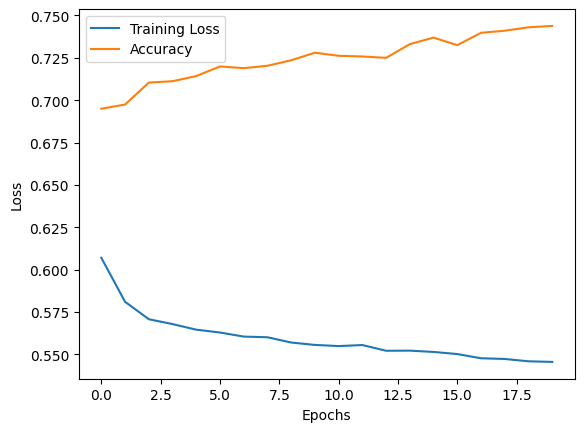

In [18]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['binary_accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
accuracy_score(list(map(lambda x: round(x[0]),model.predict(x_test))), y_test)


52/52 [==============================] - 0s 2ms/step


0.7513677811550152

In [20]:

accuracy_score(list(map(lambda x: round(x[0]),model.predict(x_train))), y_train)


155/155 [==============================] - 0s 3ms/step


0.7513173895419538